# Support Vector Machines (SVM)

### Exercise 1: Visualizing SVM Decision Boundaries

In this exercise, you will generate a simple 2D dataset that may be linearly separable or non-linearly separable. You will then train SVM models using both a linear kernel and an RBF (Gaussian) kernel.

You will visualize:
- the decision boundary (where the classifier outputs 0),
- the margin boundaries (decision score +1 and −1),
- and the support vectors used by the classifier.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

In [12]:
def plot_training_data_with_decision_boundary(kernel):
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=150,
        facecolors="none",
        edgecolors="k",
    )

    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    if ax is None:
        plt.show()

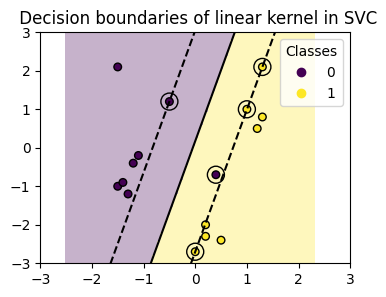

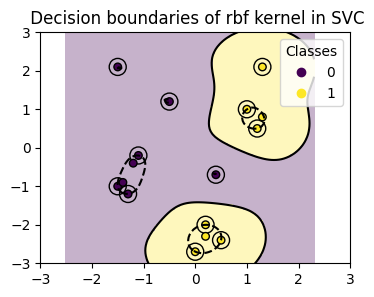

In [13]:
plot_training_data_with_decision_boundary("linear")
plot_training_data_with_decision_boundary("rbf")

### Exercise 2: Logistic Regression vs. Linear SVM


Train two classifiers on the same 2D dataset:
- Linear SVM (using a linear kernel)
- Logistic Regression

Plot both decision boundaries on the same figure and visually compare them.

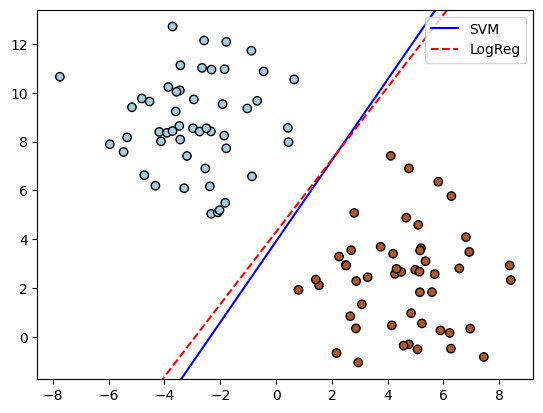

In [20]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=2.0)

model_svm = svm.SVC(kernel="linear").fit(X, y)
model_lr = LogisticRegression().fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Paired", edgecolors="k")

ax = plt.gca()
xlim, ylim = ax.get_xlim(), ax.get_ylim()
xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100)
)
grid = np.c_[xx.ravel(), yy.ravel()]

Z_svm = model_svm.decision_function(grid).reshape(xx.shape)
Z_lr = model_lr.decision_function(grid).reshape(xx.shape)

plt.contour(xx, yy, Z_svm, levels=[0], colors="blue")
plt.contour(xx, yy, Z_lr, levels=[0], colors="red", linestyles="--")

plt.plot([], [], color="blue", label="SVM")
plt.plot([], [], color="red", linestyle="--", label="LogReg")
plt.legend()
plt.show()

### Exercise 3: Predicting Phishing Websites Using SVM


In this exercise, you will train an SVM model to distinguish legitimate websites from phishing websites based on features such as URL length, presence of suspicious characters, domain age, HTTPS usage, and more.

You will:
- Train an SVM classifier
- After training, compute and report:
    - Accuracy
	- F1 Score
	- Confusion Matrix
- Discuss what each metric tells you about model performance and class imbalance.
- Analyze incorrect predictions
    - Inspect the samples the model classified incorrectly.
    - For each type of misclassified case, try to answer:
	    - What feature patterns might have confused the model?
	    - Could noise or missing information be causing errors?
	    - Do certain phishing attempts closely resemble legitimate behavior?



In [40]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import StandardScaler

In [35]:
import pandas as pd
from scipy.io import arff

# because of problems with connection to ucimlrepo server
data, meta = arff.loadarff("../data/phishing+websites/Training Dataset.arff")

df = pd.DataFrame(data)

dataset = df.apply(lambda x: x.str.decode("utf-8").astype(int) if x.dtype == "object" else x)

dataset

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [37]:
# from ucimlrepo import fetch_ucirepo

# # https://archive.ics.uci.edu/dataset/327/phishing+websites
# # dataset = fetch_ucirepo("../data/phishing+websites")
X = dataset.drop("Result", axis=1)
y = dataset["Result"]

In [38]:
X

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


In [39]:
y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
scaler = StandardScaler().fit(X_train)

In [43]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
model = SVC(kernel='rbf', C=1.0)

model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [45]:
y_pred = model.predict(X_test_scaled)

In [46]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nDetailed Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9525
F1 Score: 0.9587

Confusion Matrix:
[[ 887   69]
 [  36 1219]]

Detailed Report:
              precision    recall  f1-score   support

          -1       0.96      0.93      0.94       956
           1       0.95      0.97      0.96      1255

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211

